# 지도 학습  > 분류 > 분류 결과에 대한 평가 

### 지표 

- 정확도 ()
> 결과가 얼마나 정확하게 나누어 졌는가를 기준으로 분류기의 성능을 평가 
> **정확도 = 정답과 일치한수 / 전체 데이터수**
> 예) 수신된 메일이 100건 , 분류기로 분류를해보니 스팸이 60건으로 일치되어 처리 , 정상은 40건 체크 -> 60/100 =>60%
> 무작위로 선택된 결과 최저성능으로 두는 밥법 

- 정밀도 ()
> 출력 결과에서 정답을 얼마나 맞혔는지 나타내는 지표
> **분류기가 스팸으로 판정한 메일들중에서 진짜 스팸일 비율**
> 스팸 판정한 메일이 80개이다. 이중 진짜가 55개다 => 55/80 => 0.6875
> 많이 분류를 해내지 못하더라도  더정확한 예측을 중시한다면 정밀도 !!!
-> 스팸이 들어 와도 좋으니 , 반드시 받아야하는 메일을 스팸으로 잡히면 안된다.

- 재현율
> 출력 결과가 실제 정답중에서 얼마나 맞혔는가를 나타내는 지표 
> 전체 데이터에 포함된 실제스팸 60건, 분류가 스팸으로 판정한 개수 (55건)의 비율 => 55/60 => 0.916
> 현재 상황을 보면 재현율이 정밀도 보다 1에 더 가까우므로 재현율을 중시한다라고 이 분류기를 체크 할수 있다. 
> 잘못 거르더라도, 스팸을 놓지않는다 이런 경우 재현율을 중시 
=> 질병 => 발생 빈도가 낮은 질병이라도, 거짓 양성이 가금 나오더라도 이런환자는 재검사를 통해서 확진하면 되니까. 문제가 없다. => 라는 논리를 가진 문제 

- f-점수 ,f1-score(균형)
>균형 잡힌 성능 평가 지표 
>정밀도와 재현율의 상충관계 => 평가에 반영하여, 실제 분류기를 비교할때 사용하는 지표
> f-measure => 2/(1/정밀도) + (1/재현율) = 2/(1/0.68+1/0.92) = 0.782

> 정밀도와 재현율이 균형을 이룰때, F-점수는 높아진다.

- ROC곡선

- AUC

- 평가 기준 => 균형 
> 비표는 프로젝트나 비지니스 상에 최소한의 품질을 확보하는 기준점  
> 문제점
    - 지표에 매몰되는 부분 (지표가 목적이됨)
      - 학습 모델의 성능을 높이는 부분과 비지니스 목적을 달성하는 부분은 다.르.다

# 지도 학습  > 분류 >회귀 모델에 대한 평가 

### 지표 
### *추천시스템 체크*

- 평균 제곱근 오차
- 결장 계수

#### 관련 개념 

- 혼동행렬(confusion matrix)

 > 양성(스팸이 맞음) => 진짜 양성(True Positive: TP) <-> 거짓 음성(False Negative :FN ) 
 > 음성(스팸 아님) => 거짓 양성(False Positive: FT) <-> 진짜 음성(True Negative  :TN)
 
 > 메일은 총 100건, 실제스팸은 60건 (일일이 확인), 분류기가 판정한 스팸이 80건, 그중 진짜 스팸은 55건
                            
             예측 결과
---------------------------------------------------------------------
            양성(스팸)                         음성(스팸아님)
 실제:         55:TP                             5(60-55):FN                
 결과:     25(80-55):FP                          15(20-5):TN

- TP,FP,FN(),TN()
- 55        : 메일 100건 중, 실제스팸 60개, 분류기의 판정 80개, 그중 맞춘게 55개 (TP)
- 25(80-55) : 분류기가 판정한 80개 그중 맞춘것이 55개 틀린것 25개 (FP)
- 5(60-55)  : 실제스팸이 60개 그중에서 분류기에 맞춘것이 55개 합이 틀리것이 5개(TN)
- 15(20-5)  : 스팸이 아니라고 판정-> 20개 (100-80)개 그중 진짜스팸이 5개 이것을 뺀 15개(FN)

- 정밀도 = TP/(TP+FP)
> 분류기가 맞춘 스팸중에 진짜 스팸이 얼마나 있는가?
> 55 / 80 => 55 / ( 55 + 25 ) = 0.6875
- 재현율 = TP/(TP+FN) = 0.916
> 분류기가 분류한 스팸이 진짜 스팸 대비 얼마나 되는가 
> 55 / 60 = 55 / ( 55 + 5 ) = 0.916
- 정확도  =(TP+TN)/)(TP+FP+TN+FN)
>( 55 + 15 ) / ( 55 + 25 + 15 + 5 ) = 0.7

=> sklearn.metrics.confusion_matrix() 이함수가 자동 계산 
=> 혼동 행렬 값을 계산해서 리턴해준다 => 이를 통해서 모델 비교, 평가를 자동으로 수행 할수 있다. 
[[ 55, 5 ]]
[[ 25, 15 ]]

#### 다중 클래스 분류에서 클래스 전체의 평균을 구하는 방법 2가지 
- 마이크로 평균 
> 모든 클래스의 결과를 합쳐서 전체를 평가
> 3개 클래스의 결과=> TP1,FP1,TP2,FP2,TP3,FP3 이렇게 존재 한다면 
> 정밀도 (마이크로 평균) = ( TP1 + TP2 + TP3 ) / ( TP1 + FP1 + TP2 + FP2 + TP3 + FP3 )

-  매크로 평균 
> 전체 성능의 양상을 알기위해 사용 
> 클래스 별 정밀도를 확득 
> 정밀도( 매크로 평균 ) = ( 정밀도 1 + 정밀도 2 + 정밀도 3 ) / 3

In [33]:
from matplotlib import pyplot as plt
import sklearn.datasets
import pandas as pd

In [34]:
# 아이리스 데이터 로드 
def attach_iris_df():
    #데이터 로드 
    ds = sklearn.datasets.load_iris()
    #print(type(ds).ds['data'])
    
    #df 구성
    df = pd.DataFrame( ds['data'], columns=ds['feature_names'])
    
    #print (ds['target_names'])
    # 레이블 데이터  컬럼명은 species
    # species라는 컬럼명을 추가하고 , target_name의 값을 세팅 
    #정답 데이터는 ds['target']
    tmp = dict(zip(range(3),ds['target_names']))
    df['species'] = [tmp[idx] for idx in ds['target']]

    return df

In [35]:
df = attach_iris_df()
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [36]:
# roc, auc를 이용한 성능평가를 수행하기 위해 모듈 가져오기
import sklearn
# 측정 패키지
from sklearn.metrics import roc_curve, auc
# 훈련용, 테스트용 분류
from sklearn.model_selection import train_test_split
# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [37]:
# 분류 알고리즘 별로 손쉽게 시각화를 하기 위해 값 세팅
class_map = {
    '로지스틱 회귀':('-' , LogisticRegression()),    
    '결정 트리':    ('--', DecisionTreeClassifier(max_depth=5)),
    '랜덤 포레스트':('.-', RandomForestClassifier(max_depth=5, n_estimators=10, 
                           max_features=1)),
    '나이브 베이즈':(':' , GaussianNB())
}

In [38]:
df.shape

(150, 5)

In [39]:
#데이터를 나눠서 임시 구성 
# species를 제외하고 나머지만 150x4
X = df[df.columns[:4]]
X.shape

(150, 4)

In [40]:
set( df['species'] )

{'setosa', 'versicolor', 'virginica'}

In [41]:
# Y는 이진 분류 데이터로 구성하겠다.
# 종이 setosa 인가 아닌가로 구성 하는데 , 
Y = df['species']  == 'versicolor'
Y[:2],type(Y),Y.shape

(0    False
 1    False
 Name: species, dtype: bool, pandas.core.series.Series, (150,))

In [42]:
# 데이터를 훈련용 , 테스트용
# 테스트용 비율을 의도적으로 높임
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.8 )

In [43]:
X_train.shape, X_test.shape

((30, 4), (120, 4))

In [44]:
for a in class_map.items():
    print(a)

('로지스틱 회귀', ('-', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)))
('결정 트리', ('--', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')))
('랜덤 포레스트', ('.-', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_spl

In [45]:
# 한글 처리 
import platform
from matplotlib import font_manager, rc

get_ipython().run_line_magic('matplotlib', 'inline')

def initKoreaFontLoad() :
    plt.rcParams['axes.unicode_minus'] = False
    os_name = platform.system()
    
    if os_name == 'Darwin' :
        # MacOS, Linux
        rc('font', family = 'AppleGothic')
    elif os_name == 'Windows' :
        # window10 ~ window server
        path = 'c:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        print(font_name)
        rc('font', family = font_name)
    else :
        print('알 수 없는 시스템')
        pass
initKoreaFontLoad()

Malgun Gothic


 # 예측
> predict_proba(): 예측에 대한 확률로 예측 -> 알고리즘의 신뢰 수준을 알수 있어서 유연하게 비교시에 활용(0,1 중에 1이 될 확률 0.57이다. => 1을)
> 상대적으로 더 예측하는 모델인데, 만약 해당 모델이 0을 더 잘맞춘다고 본다면 예측 값은 0으로 해석
>predict() : 예측 값을 기준으로 예측

C:\Users\sun41\AppData\Local\Continuum\anaconda3\envs\analysis\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


로지스틱 회귀 auc:0.8032296650717704
결정 트리 auc:0.9641148325358853
랜덤 포레스트 auc:0.9835526315789473
나이브 베이즈 auc:0.9560406698564593


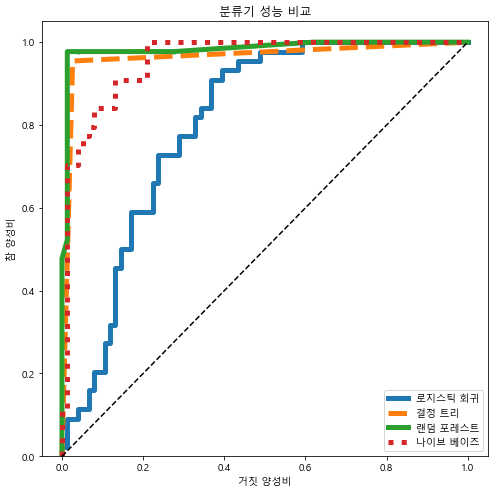

In [46]:
plt.figure(figsize=(8,8))

for name, ( line_style, model ) in class_map.items():
    #훈련
    model.fit( X_train, Y_train )
    #예측
    preds = model.predict_proba(X_test)
    # print(preds[:2])
    
    # roc 커브 생성 
    pred = pd.Series(preds[:, 1])
    #fpr : 거짓 양성비
    #tpr : 참 양성비 : true positive rate 
    #thresholds : fpr, tpr를 계산 할때 사용한 결정 함수의 임계값
    
    fpr,tpr,thresholds = roc_curve(Y_test, pred)
    #auc 스코어  => 곡선을 보다보면 수치적 비교가 않된다.
    auc_score = auc(fpr , tpr)
    print('%s auc:%s' %(name, auc_score))
    
    # 그리기 
    plt.plot( fpr, tpr, line_style, linewidth = 5, label = name )
    
plt.legend()
plt.title('분류기 성능 비교')
# 구분을 위해서 대각선 기울기가 1인 선을 드로잉 
plt.plot([0,1],[0,1], 'k--' )
# 구간 제한
plt.ylim([0.0, 1.05])

# 라벨 
plt.xlabel('거짓 양성비')
plt.ylabel('참 양성비')
plt.show()

 # 한놈은 직접받고 한놈은 듀플로 받고 

In [47]:
# 매크로 평균 , 마이크로 평균 
from sklearn.metrics import f1_score
y_true = [ 0, 1, 2, 0, 1, 2 ]
y_pred = [ 0, 2, 1, 0, 0, 1 ]
# 매크로  평균기반 
# 정밀도 = 참의 개별값 합산 /(참의 개별값 합산 + 거짓의 개별값 합산)
print(f1_score(y_true, y_pred, average = 'macro' ))

0.26666666666666666


In [49]:
# 마이크로 평균기반 
# 정밀도 = ( 정밀도 1+ 정밀도 2+ ...)/ n개의 클래스 분류 개수 
print(f1_score(y_true, y_pred, average = 'micro' ))

0.3333333333333333


In [50]:
print(f1_score(y_true, y_pred, average = 'weighted' ))

0.26666666666666666


In [51]:
print(f1_score(y_true, y_pred, average = None ))

[0.8 0.  0. ]


### 지도학습 > 회귀 > 회귀 모델에 대한 평가

#### 지표
##### 추천 시스템에서 체크
- 평균 제곱근 오차
- 결정계수

### 기타 > A/B 테스트
- 일반 s/w에서 테스트를 하는 방식을 혼용

할때마다 
예측하고 훈련하고 그림

### 기타 > A/B테스트 
- 일반 S/W